In [135]:
import seaborn as sns
import pandas as pd

data = sns.load_dataset('penguins')

In [136]:
data.dropna(inplace=True, axis=0)

In [137]:
sex_dummies = pd.get_dummies(data['sex'], dtype='int64')
island_dummies = pd.get_dummies(data['island'], dtype='int64')

data.drop('sex', inplace=True, axis=1)
data.drop('island', inplace=True, axis=1)

data = data.join([sex_dummies, island_dummies], how='left')

In [138]:
from sklearn.model_selection import train_test_split

X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [139]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [140]:
y_pred = knn.predict(X_test)

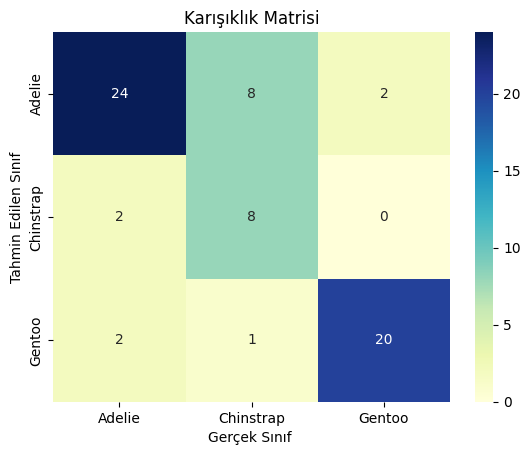

In [176]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

label = ['Adelie', 'Chinstrap', 'Gentoo']
conf_matrix = confusion_matrix(y_pred, y_test, labels=label)
conf_matrix = pd.DataFrame(conf_matrix, columns=label, index=label)

sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu')

plt.title('Karışıklık Matrisi')
plt.xlabel('Gerçek Sınıf ')
plt.ylabel('Tahmin Edilen Sınıf')

plt.show()

In [190]:
binary_matrices = []
for i, class_label in enumerate(conf_matrix.index):
    TP = conf_matrix.iloc[i, i]
    FN = conf_matrix.iloc[:, i].sum() - TP
    FP = conf_matrix.iloc[i, :].sum() - TP
    TN = conf_matrix.sum().sum() - (TP + FN + FP)

    binary_matrices.append([TP, FN, FP, TN])
binary_matrices = pd.DataFrame(binary_matrices, columns=['TP', 'FN', 'FP', 'TN'], index=label)

In [195]:
binary_matrices

,TP,FN,FP,TN
Adelie,24,4,10,29
Chinstrap,8,9,2,48
Gentoo,20,2,3,42


In [199]:
accuracy = []
for i in range(0, len(binary_matrices)):
    TP = binary_matrices.iloc[i, 0]
    FN = binary_matrices.iloc[i, 1]
    FP = binary_matrices.iloc[i, 2]
    TN = binary_matrices.iloc[i, 3]

    accuracy.append((TP + TN) / (TP + TN + FP + FN))

binary_matrices['accuracy'] = accuracy

In [205]:
precision = []
for i in range(0, len(binary_matrices)):
    TP = binary_matrices.iloc[i, 0]
    FP = binary_matrices.iloc[i, 2]

    precision.append(TP / (TP + FP))

binary_matrices['precision'] = precision

In [206]:
sensitivity = []
for i in range(0, len(binary_matrices)):
    TP = binary_matrices.iloc[i, 0]
    FN = binary_matrices.iloc[i, 1]

    sensitivity.append(TP / (TP + FN))

binary_matrices['sensitivity'] = sensitivity

In [207]:
specificity = []
for i in range(0, len(binary_matrices)):
    FP = binary_matrices.iloc[i, 2]
    TN = binary_matrices.iloc[i, 3]

    specificity.append(TN / (TN + FP))

binary_matrices['specificity'] = specificity

In [208]:
f1_score = []
for i in range(0, len(binary_matrices)):
    precision = binary_matrices.iloc[i, 5]
    sensitivity = binary_matrices.iloc[i, 6]

    f1_score.append(2 * ((precision * sensitivity) / (precision + sensitivity)))

binary_matrices['f1_score'] = f1_score

In [209]:
binary_matrices

,TP,FN,FP,TN,accuracy,precision,sensitivity,specificity,f1_score
Adelie,24,4,10,29,0.791045,0.705882,0.857143,0.743590,0.774194
Chinstrap,8,9,2,48,0.835821,0.800000,0.470588,0.960000,0.592593
Gentoo,20,2,3,42,0.925373,0.869565,0.909091,0.933333,0.888889
